## wine Dataset Classification using K-Nearest Neighbors with Dimension Reduction

In [7]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid

## 3D K-Nearest Neighbor

In [2]:
wine = load_wine()

pca = PCA(n_components=3)
features = pca.fit(wine.data).transform(wine.data)

feature_names = wine.feature_names
target = wine.target
target_names = wine.target_names

print(features.shape)

(178, 3)


train size :  142  / test size :  36

Training set score: 1.000000
Test set score: 0.805556
Training Time : 0.0168 sec


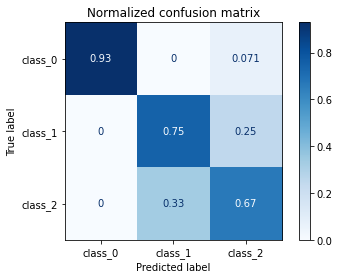

In [3]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

start = time.perf_counter()

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test)

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

## 2D K-Nearest Neighbor

In [4]:
pca = PCA(n_components=2)
features = pca.fit(wine.data).transform(wine.data)

feature_names = wine.feature_names
target = wine.target
target_names = wine.target_names

print(features.shape)

(178, 2)


train size :  142  / test size :  36

Training set score: 1.000000
Test set score: 0.777778
Training Time : 0.0151 sec


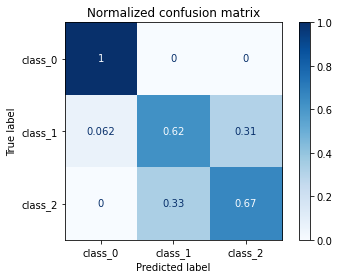

In [5]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

start = time.perf_counter()

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test)

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()

## Nearest Centroid Classifier

train size :  142  / test size :  36

Training set score: 0.711268
Test set score: 0.777778
Training Time : 0.0004 sec


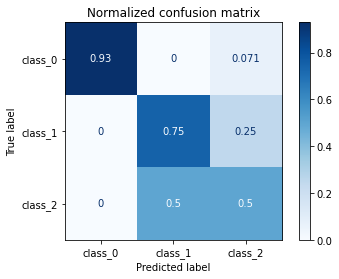

In [6]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

nc = NearestCentroid()
nc.fit(x_train, y_train)

train_score = nc.score(x_train, y_train)

start = time.perf_counter()
test_score = nc.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

disp = ConfusionMatrixDisplay.from_estimator(nc, x_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()